<a href="https://colab.research.google.com/github/harithaselvakumaran/Customer_Churn_Prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (2).csv


In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting Total charges from string to int

In [ ]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
df['TotalCharges'].values[5].strip()

'820.5'

In [ ]:
df.shape

(7043, 20)

In [ ]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]
## Or you could directly use errors='coerce' which will replace all ' ' values Nan

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [ ]:
df_new = df[df['TotalCharges']!=' ']

In [ ]:
df_new[df_new['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
## We have dropped all the rows with empty Total Charges
df_new.shape

(7032, 20)

In [ ]:
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
tenure_churn_no = df_new[df_new['Churn']=='No']['tenure']
tenure_churn_yes = df_new[df_new['Churn']=='Yes']['tenure']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


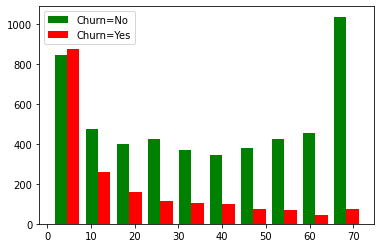

In [ ]:
plt.hist([tenure_churn_no, tenure_churn_yes], color=['green','red'], label=['Churn=No', 'Churn=Yes'])
plt.legend()

As tenure increases, churn rate decreases

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


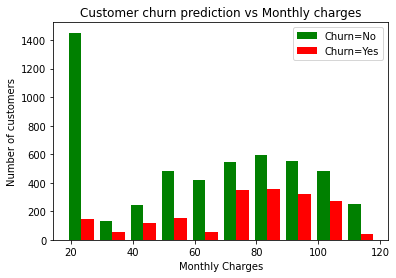

In [ ]:
mc_churn_no = df_new[df_new['Churn']=='No']['MonthlyCharges']
mc_churn_yes = df_new[df_new['Churn']=='Yes']['MonthlyCharges']

plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Customer churn prediction vs Monthly charges')

plt.hist([mc_churn_no, mc_churn_yes], color=['green','red'], label=['Churn=No', 'Churn=Yes'])
plt.legend()

When monthly charges are low, there is low churn 

In [ ]:
df_new['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

### Label Encoding

In [ ]:
def unique_value_cat_col(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [ ]:
unique_value_cat_col(df_new)

NameError: ignored

In [ ]:
df_new.replace('No internet service','No',inplace=True)
df_new.replace('No phone service','No',inplace=True)

In [ ]:
df_new.replace('Yes',1,inplace=True)
df_new.replace('No',0,inplace=True)

In [ ]:
df_new['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
# One-hot encoding as it has more than 3 categories
df_new = pd.get_dummies(df_new, columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
for column in df_new:
    print(f'{column} : {df_new[column].unique()}')

In [ ]:
df_new.head()

In [ ]:
df_new.shape

All the values are now in integer format

In [ ]:
df_new.dtypes

Scaling the values between 0-1

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_new[cols_to_scale] = mms.fit_transform(df_new[cols_to_scale])

In [ ]:
df_new.head()

In [ ]:
for column in df_new:
    print(f'{column} : {df_new[column].unique()}')

### Model Building

In [ ]:
X = df_new.drop('Churn',axis=1)
Y = df_new['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=25)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5139 - accuracy: 0.7516
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7895
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.7975
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8053
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8027
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8050
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8059
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4120 - accura

In [ ]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.7832


[0.4429742097854614, 0.783226728439331]

In [ ]:
Y_pred = model.predict(X_test)
Y_pred[:5]

array([[0.00237203],
       [0.02592084],
       [0.06945553],
       [0.16129929],
       [0.3288316 ]], dtype=float32)

In [ ]:
yp = []
for element in Y_pred:
  if element>0.5:
    yp.append(1)
  else:
    yp.append(0)

In [ ]:
yp[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [ ]:
Y_test[:10]

6366    0
4007    0
6252    0
173     1
523     1
1202    1
3187    0
4514    0
6943    1
4016    0
Name: Churn, dtype: int64

### Classification report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test,yp))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1053
           1       0.57      0.55      0.56       354

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



Text(33.0, 0.5, 'True')

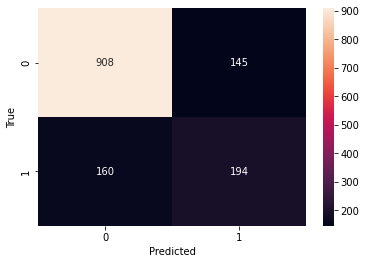

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=Y_test, predictions=yp)

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
#Accuracy
round((908+194)/(908+145+194+160),2)

0.78

In [ ]:
#Precision for 0 - out of all 0 predictions how many were correct
round(908/(908+160),2)

0.85

In [ ]:
#Precision for 1
round(194/(145+194),2) #Because of imbalanced dataset

0.57

In [ ]:
# Recall for 0 - out of actual 0's how many of them were predicted right
round(908/(908+145),2)

0.86

In [ ]:
# Recall for 1 - out of actual 1's how many of them were predicted right
round(194/(160+194),2)

0.55